This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 


The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [2]:
pip install XGBoost

  Obtaining dependency information for XGBoost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.2/99.8 MB 2.4 MB/s eta 0:00:43
   ---------------------------------------- 0.2/99.8 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.4/99.8 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/99.8 MB 2.3 MB/s eta 0:00:43
   ---------------------------------------- 0.7/99.8 MB 2.7 MB/s eta 0:00:38
   ---------------------------------------- 0.8/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.0/99.8 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 1.1/99.8 MB 3.1 MB/s eta 0:00:33
   -----------------------------

In [3]:
##Importing libraries:

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [4]:
df = pd.read_csv('avocado.csv')

In [5]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(16468, 14)

In [7]:
df.dropna(axis=1, how='all').shape

(16468, 14)

In [132]:
df.dropna(subset=['Unnamed: 0','Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']).shape

(1517, 14)

In [8]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.fillna(0,inplace=True)

In [10]:
df.fillna(0)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0
16464,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0
16465,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0
16466,0.0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0.0,0


#checking for the first five and last five rows of the dataset

### EXPLORATORY DATA ANALYSIS

In [11]:
df.shape

(16468, 14)

In [12]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16468 non-null  float64
 1   Date          16468 non-null  object 
 2   AveragePrice  16468 non-null  float64
 3   Total Volume  16468 non-null  float64
 4   4046          16468 non-null  float64
 5   4225          16468 non-null  float64
 6   4770          16468 non-null  float64
 7   Total Bags    16468 non-null  float64
 8   Small Bags    16468 non-null  float64
 9   Large Bags    16468 non-null  float64
 10  XLarge Bags   16468 non-null  float64
 11  type          16468 non-null  object 
 12  year          16468 non-null  float64
 13  region        16468 non-null  object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [14]:
df.size

230552

In [15]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,16468.000000,16468.000000,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,1.646800e+04,16468.000000,16468.000000
mean,2.486762,0.099026,1.475620e+05,5.954867e+04,5.632443e+04,4.643256e+03,2.704562e+04,2.291654e+04,3.928102e+03,200.980491,185.632864
std,9.013772,0.316127,1.422640e+06,6.198093e+05,5.375100e+05,4.427404e+04,2.451576e+05,2.092160e+05,3.792962e+04,2348.549525,582.787716
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


#The above data shows standard deviation,mean count, 25%percentile, 50%percentile,75% percentile, minimum value and max value

In [16]:
df.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.18, 1.29, 1.25, 1.03, 1.39,
       1.4 , 1.36, 1.3 , 0.88, 1.21, 0.9 , 0.94, 0.75, 0.77, 0.81, 0.8 ,
       0.72, 0.79, 0.67, 0.82, 0.68, 0.76, 0.91, 1.38, 0.92, 0.78, 0.74,
       0.62, 0.83, 0.87, 0.73, 0.7 , 0.89, 0.85, 1.44, 1.42, 1.41, 0.49,
       0.53, 0.66, 0.56, 0.6 , 0.71, 0.65, 0.58, 0.54, 0.52, 0.51, 0.57,
       0.63, 0.64, 0.61, 0.84, 0.86, 0.69, 1.52, 1.53, 1.49, 1.48, 1.56,
       1.62, 1.63, 1.46, 1.51, 1.61, 1.47, 1.66, 1.57, 1.6 , 1.5 , 1.68,
       1.54, 1.64, 1.58, 0.  ])

In [17]:
df.AveragePrice.value_counts()

0.00    14951
1.08       46
0.99       44
1.03       44
1.09       43
        ...  
0.64        1
0.51        1
0.52        1
0.54        1
0.49        1
Name: AveragePrice, Length: 114, dtype: int64

<Axes: >

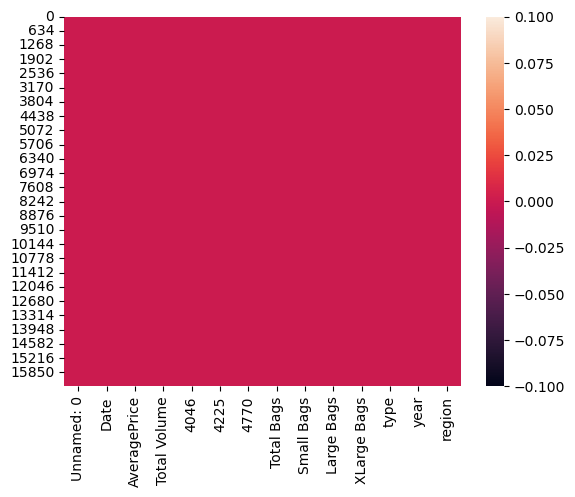

In [18]:
sns.heatmap(df.isnull())

In [19]:
df["Date"]

0        27-12-2015
1        20-12-2015
2        13-12-2015
3        06-12-2015
4        29-11-2015
            ...    
16463             0
16464             0
16465             0
16466             0
16467             0
Name: Date, Length: 16468, dtype: object

In [20]:
from datetime import datetime

In [21]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
df['month']=pd.DatetimeIndex(df['Date']).month
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [23]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


I have seperated Date column into three different columns like day, month, and year

In [24]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [25]:
df.drop("Date", axis="columns", inplace=True)

I have dropped date columns as per have already seperated it

In [26]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,4.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:>

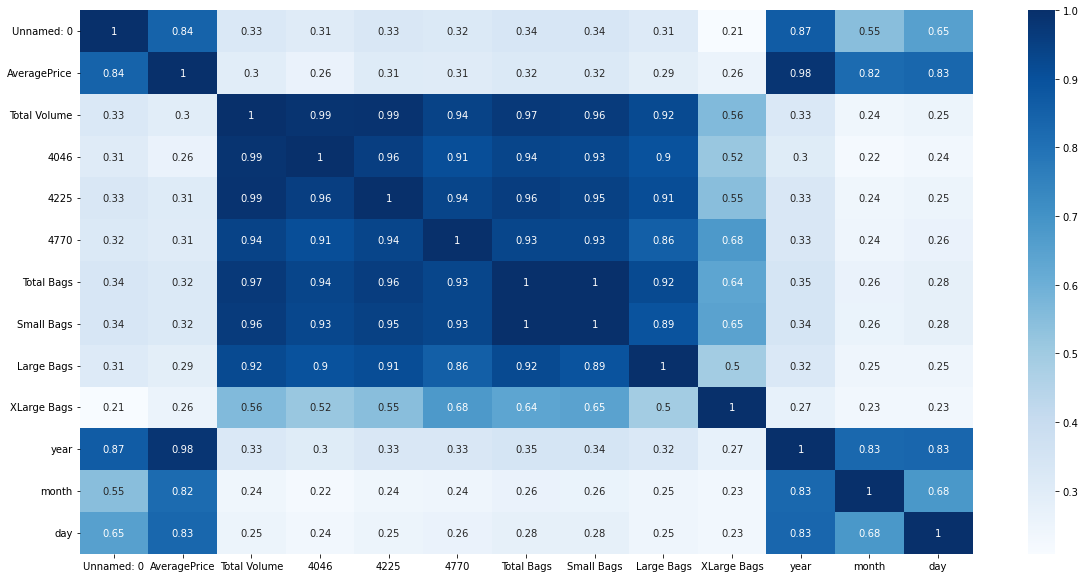

In [152]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

This shows correlation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target Variable.

In [153]:
df['AveragePrice'].mean()

0.09902598979839686

In [154]:
#Minimum Price of avocado:

df['AveragePrice'].min()

0.0

In [155]:
#Max Price of Avocado:

df['AveragePrice'].max()

1.68

In [156]:
#Max Avocados sold:

df['Total Volume'].max()

44655461.51

In [157]:
#Total no. of people purchased the avocado:

df['type'].value_counts()

0               14951
conventional     1517
Name: type, dtype: int64

In [158]:
#Correlation between total bags and total volume:

df[['Total Volume', 'Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.0000,0.9711
Total Bags,0.9711,1.0000


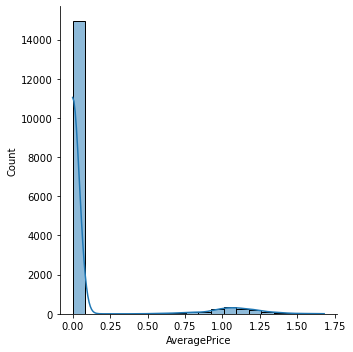

In [159]:
sns.displot(df["AveragePrice"],bins=20,kde=True)

The above distribution plot is for Average price


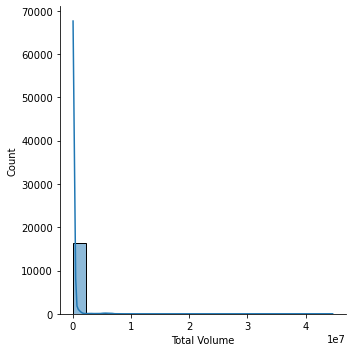

In [160]:
sns.displot(df["Total Volume"],bins=20,kde=True)

This displot is for Total Volume

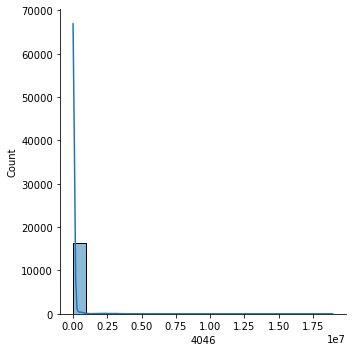

In [161]:
sns.displot(df["4046"],bins=20,kde=True)

The above distribution plot is for 4046

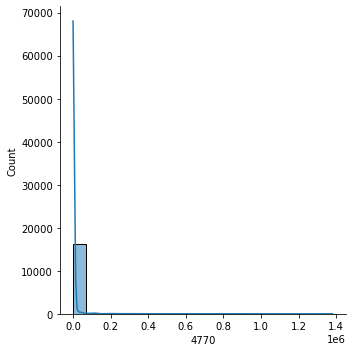

In [162]:
sns.displot(df["4770"],bins=20,kde=True)

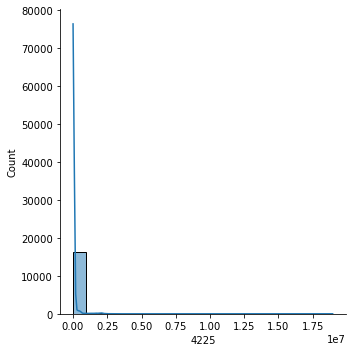

In [163]:
sns.displot(df["4225"],bins=20,kde=True)

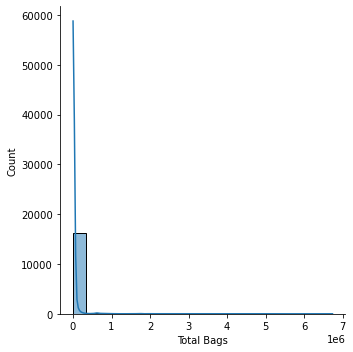

In [164]:
sns.displot(df["Total Bags"],bins=20,kde=True)

The above distribution is for total bags

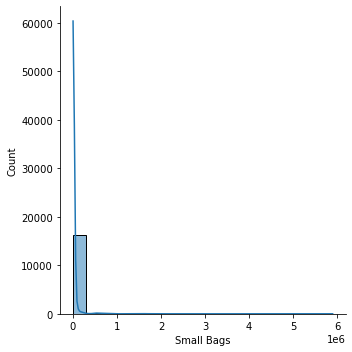

In [165]:
sns.displot(df["Small Bags"],bins=20,kde=True)

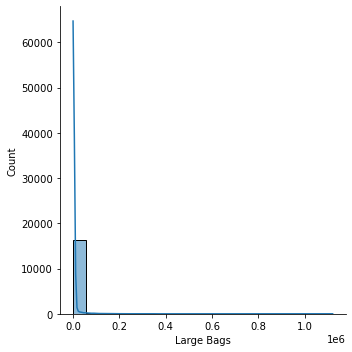

In [166]:
sns.displot(df["Large Bags"],bins=20,kde=True)

the above distribution plot is for region

the above distribution is conventional type

In [169]:
#Average volume of avocado per year

df.groupby('year') ['Total Volume'].mean()

year
1970    0.000000e+00
2015    1.610065e+06
2016    1.559787e+06
Name: Total Volume, dtype: float64

In [170]:
#Avg, price of avocado in different region in last 2 years

df.groupby('region')['AveragePrice'].mean()

region
0                      0.000000
Albany                 1.238657
Atlanta                1.012037
BaltimoreWashington    1.160923
Boise                  0.974923
Boston                 1.205484
BuffaloRochester       1.301569
California             1.055921
Charlotte              1.311613
Chicago                1.214783
Columbus               1.012553
DallasFtWorth          0.755882
Denver                 1.080833
Detroit                1.041250
GrandRapids            1.136957
GreatLakes             1.107222
HarrisburgScranton     1.157368
HartfordSpringfield    1.209231
Houston                0.780690
Indianapolis           1.126250
Jacksonville           1.113659
LasVegas               1.041000
LosAngeles             0.863333
Louisville             1.042941
MiamiFtLauderdale      1.176471
Midsouth               1.081111
Nashville              1.028400
NewYork                1.248636
Northeast              1.236667
NorthernNewEngland     1.111034
Orlando                1.133333
P

In [171]:
df[df['AveragePrice']>df['AveragePrice'].mean()][['AveragePrice', 'year', 'region', '4046', '4225', '4770']]

,AveragePrice,year,region,4046,4225,4770
0,1.33,2015,Albany,1036.74,54454.85,48.16
1,1.35,2015,Albany,674.28,44638.81,58.33
2,0.93,2015,Albany,794.70,109149.67,130.50
3,1.08,2015,Albany,1132.00,71976.41,72.58
4,1.28,2015,Albany,941.48,43838.39,75.78
...,...,...,...,...,...,...
1512,1.39,2016,Charlotte,57529.11,56366.66,17531.78
1513,1.51,2016,Charlotte,43325.87,52189.61,19419.57
1514,1.48,2016,Charlotte,46364.75,52893.38,16736.92
1515,1.47,2016,Charlotte,54110.79,53593.58,17495.42


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparision between AveragePrice and Total Volume'}, xlabel='AveragePrice', ylabel='Total Volume'>

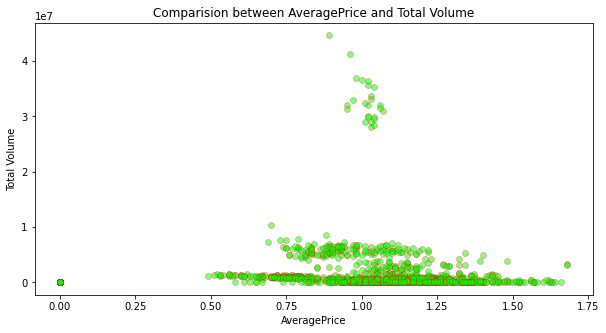

In [172]:
plt.figure(figsize=[10,5])
plt.title("Comparision between AveragePrice and Total Volume")
sns.scatterplot(df["AveragePrice"], df["Total Volume"],alpha=0.5, c=(0,1,0), edgecolor='r')

#above plot shows the target variable vs column Total Volume

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparision between AveragePrice and 4046'}, xlabel='AveragePrice', ylabel='4046'>

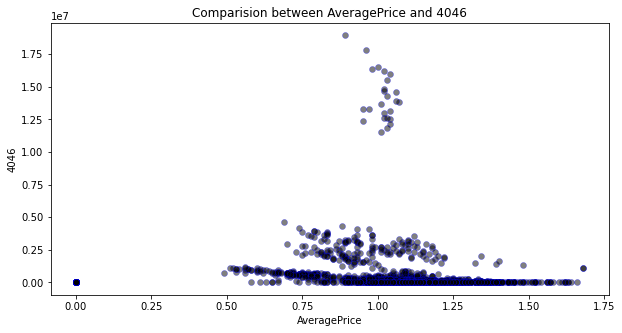

In [173]:
plt.figure(figsize=[10,5])
plt.title("Comparision between AveragePrice and 4046")
sns.scatterplot(df["AveragePrice"], df["4046"],alpha=0.5, c=(0,0,0), edgecolor='b')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Comparision between AveragePrice and XLarge Bags'}, xlabel='AveragePrice', ylabel='XLarge Bags'>

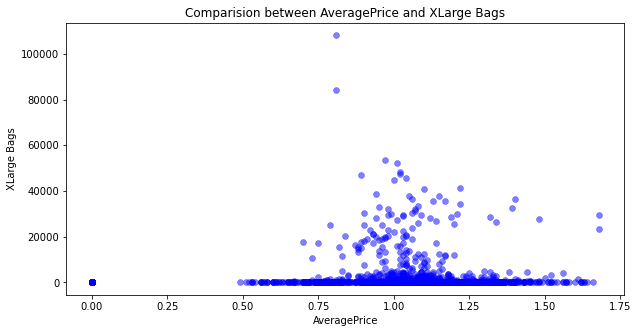

In [174]:
plt.figure(figsize=[10,5])
plt.title("Comparision between AveragePrice and XLarge Bags")
sns.scatterplot(df["AveragePrice"], df["XLarge Bags"],alpha=0.5, c=(0,0,1), edgecolor='b')

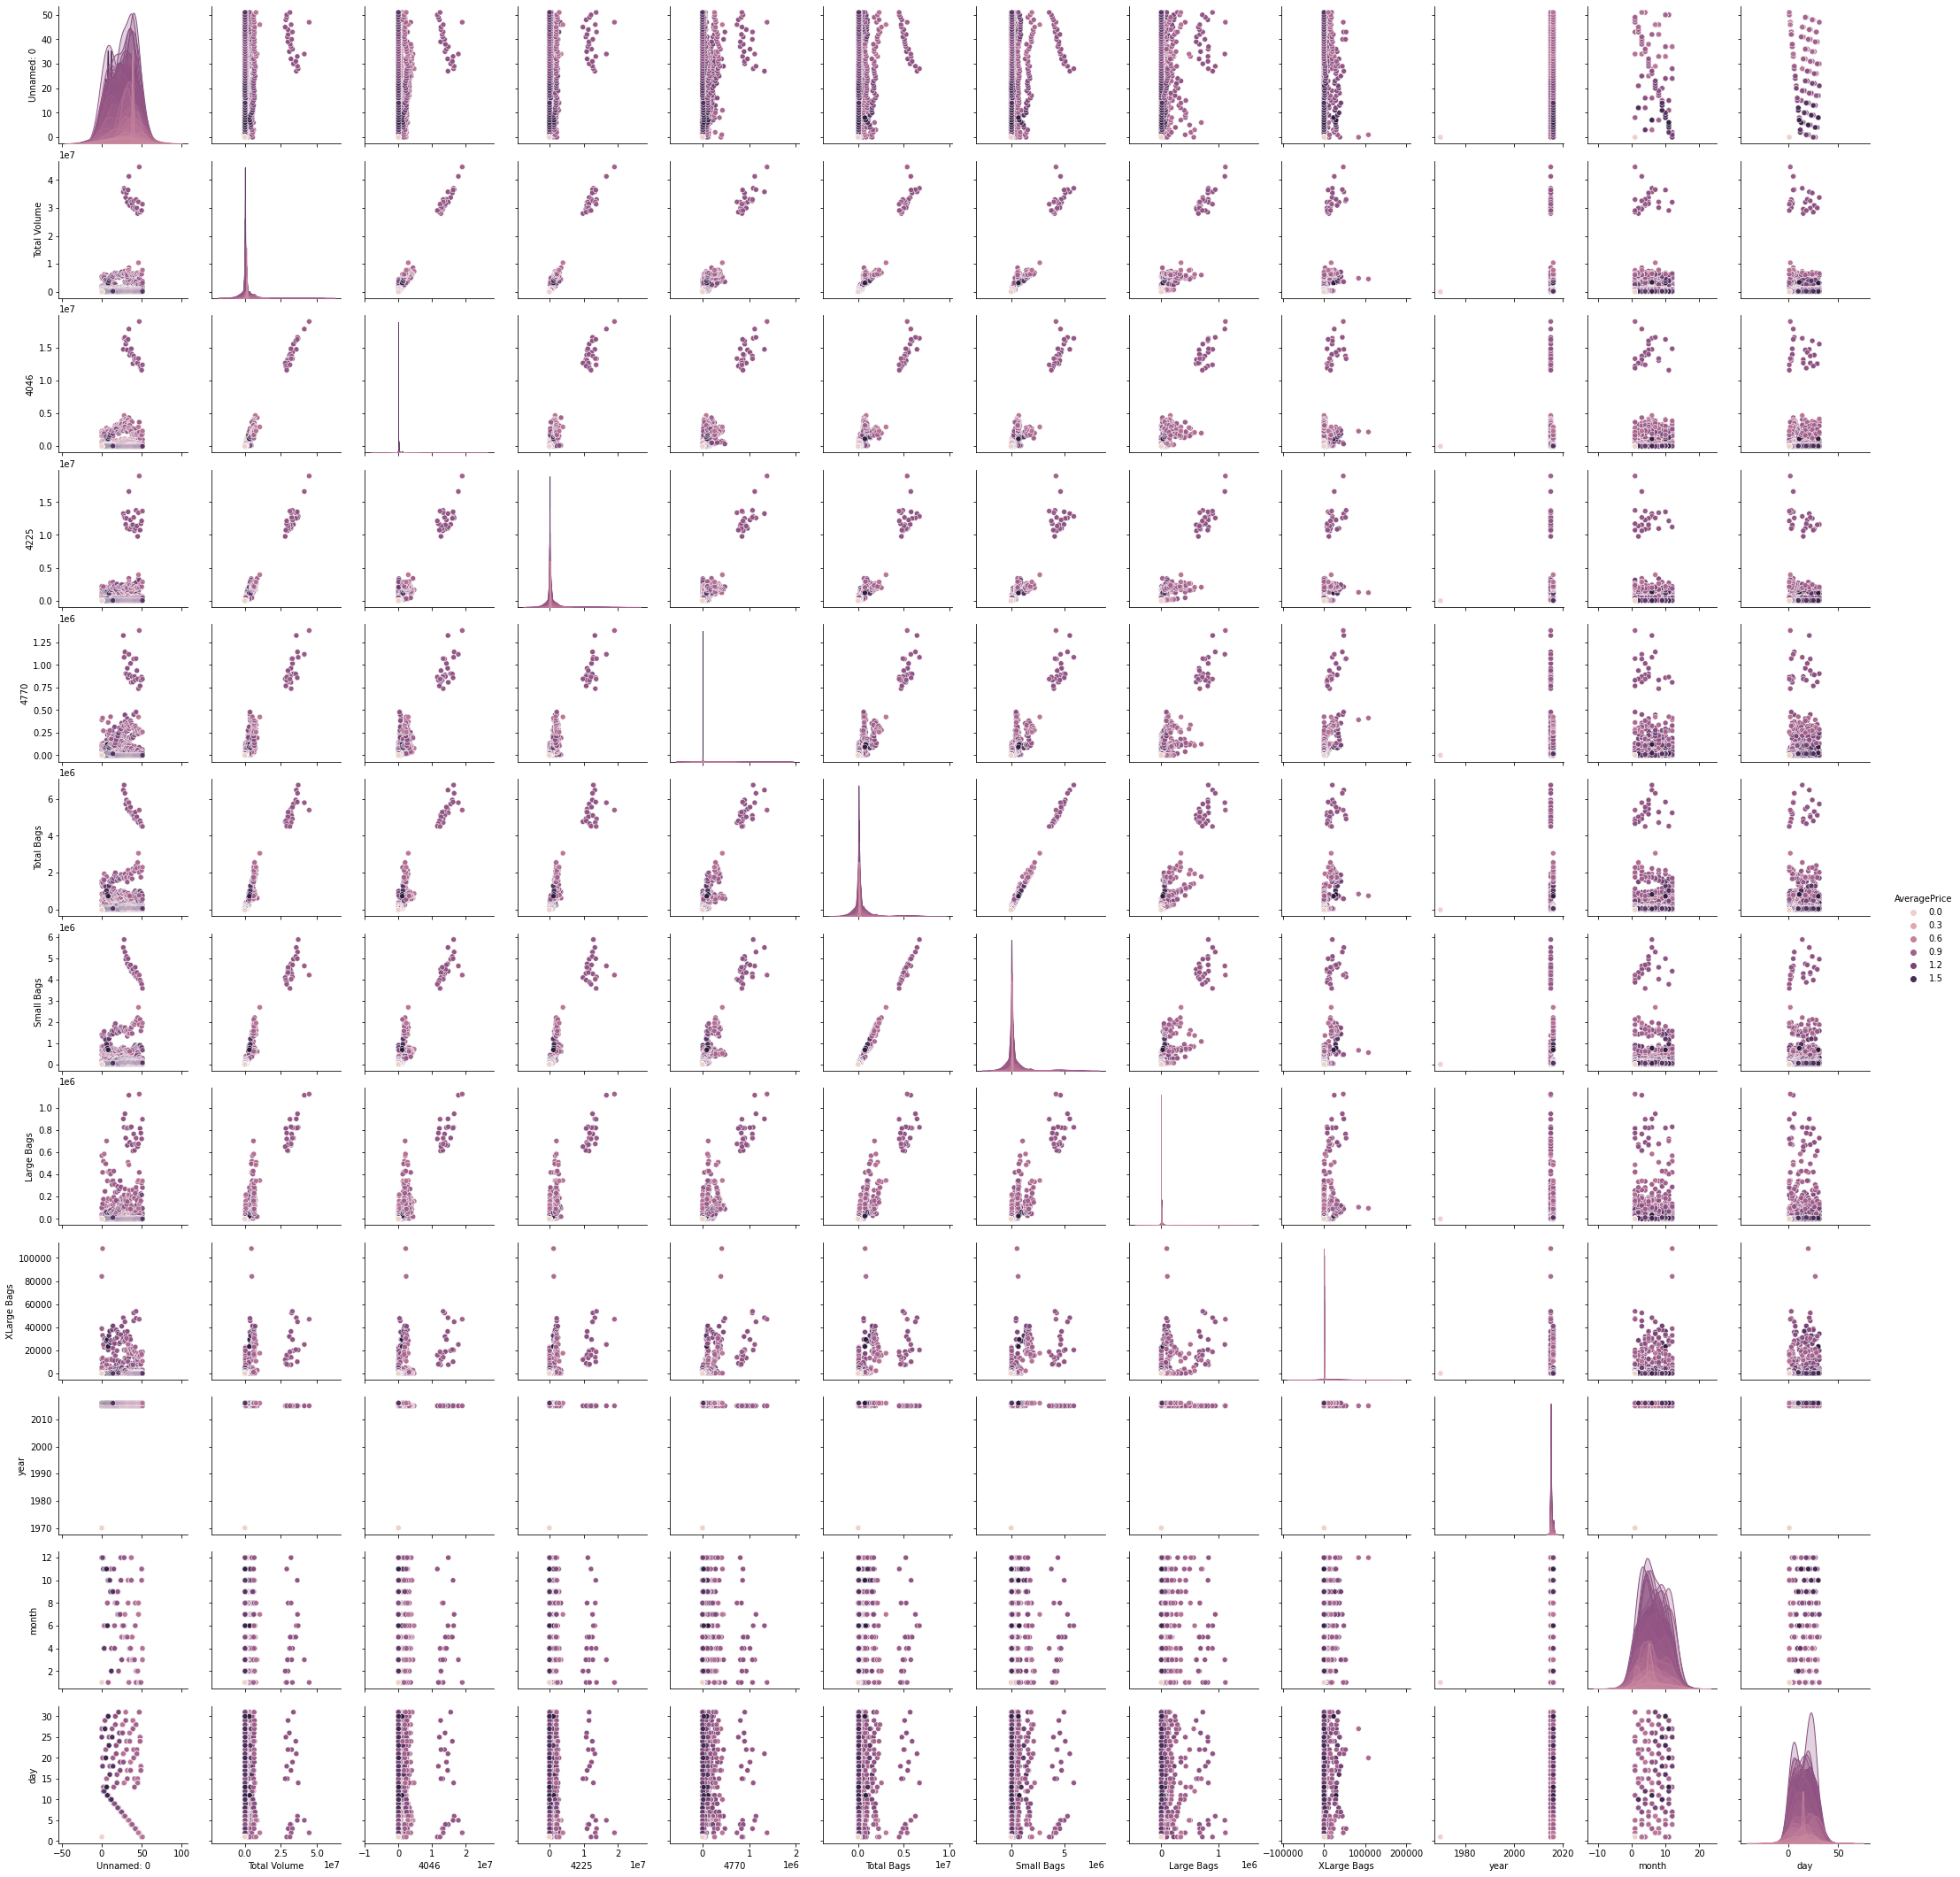

In [175]:
sns.pairplot(df,hue="AveragePrice")

Pairplot with respect to target variable

In [201]:
df.head()

,AveragePrice,Total Volume,Total Bags,type,year,region,month,day
0,1.33,64236.62,8696.87,conventional,2015,Albany,12,27
1,1.35,54876.98,9505.56,conventional,2015,Albany,12,20
2,0.93,118220.22,8145.35,conventional,2015,Albany,12,13
3,1.08,78992.15,5811.16,conventional,2015,Albany,6,12
4,1.28,51039.60,6183.95,conventional,2015,Albany,11,29


In [203]:
y=df.drop(['day','month','region','Total Bags','type','year','Total Volume'],axis=1)
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
16463,0.00
16464,0.00
16465,0.00
16466,0.00


In [208]:
x=df.drop(['AveragePrice'], axis=1)
x

,Total Volume,Total Bags,type,year,region,month,day
0,64236.62,8696.87,conventional,2015,Albany,12,27
1,54876.98,9505.56,conventional,2015,Albany,12,20
2,118220.22,8145.35,conventional,2015,Albany,12,13
3,78992.15,5811.16,conventional,2015,Albany,6,12
4,51039.60,6183.95,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...
16463,0.00,0.00,0,1970,0,1,1
16464,0.00,0.00,0,1970,0,1,1
16465,0.00,0.00,0,1970,0,1,1
16466,0.00,0.00,0,1970,0,1,1


# TRAIN_TEST_SPLIT

In [219]:
x_train,x_test,y_test,y_train=train_test_split(x,y,test_size=.25,random_state=144)

In [220]:
x_train.shape

(12351, 7)

In [221]:
y_train.shape

(4117, 1)

In [222]:
x_test.shape

(4117, 7)

In [223]:
y_test.shape

(12351, 1)

In [224]:
def reg(model,x,y):
    x_train,x_test,y_test,y_train=train_test_split(x,y,test_size=.25,random_state=708)
    
    #Training Model
    model.fit(x_train,y_train)
    
    #Predicting y_test
    pred= mode.predict(x_test)
    
    #RMSE -a lower RMSE Score is better than a higher one
    rmse = mean_squared_error(y_test,pred,squared=False)
    print("RMSE Score is:",rmse)
    
    #R2 SCORE
    r2 = r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #cross validation score
    
    cv_score = (crpss_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Result of r2 score minus cv score
    result = r2-cv_score
    print("R2 Score - Cross Validation Score is",result)

### Saving the model